In [ ]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.signal import convolve2d


#plt.rcParams['figure.figsize'] = (12, 9)



In [ ]:
img = plt.imread('image-building.tif')
plt.imshow(img, cmap='gray')
plt.show()

img2 = plt.imread('image-moon.jpg')
plt.imshow(img2, cmap='gray')
plt.show()

img3a = plt.imread('image-Dante.png')
plt.imshow(img3a, cmap='gray')
plt.show()

img4 = plt.imread('image-irish.tif')
plt.imshow(img4, cmap='gray')
plt.show()
'''
plt.figure()

f, ax = plt.subplots(2,1)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img2, cmap='gray')
'''
img3 = np.zeros([img3a.shape[0],img3a.shape[1]])
print(np.min(img3a))
for i in range(img3.shape[0]):
    for j in range(img3.shape[1]):
        #print(img3[i,j])
        el = int(img3a[i,j][0] * 255)
        img3[i,j] = min(max(el, 0), 255)

print(np.min(img3))

print(np.max(img3))

FileNotFoundError: [Errno 2] No such file or directory: 'image-building.tif'

In [ ]:
#1

'''
Stitching sample
================

Show how to use Stitcher API from python in a simple way to stitch panoramas
or scans.
'''

# Python 2/3 compatibility
from __future__ import print_function

import numpy as np
import cv2 as cv

import argparse
import sys

modes = (cv.Stitcher_PANORAMA, cv.Stitcher_SCANS)

parser = argparse.ArgumentParser(prog='stitching.py', description='Stitching sample.')
parser.add_argument('--mode',
    type = int, choices = modes, default = cv.Stitcher_PANORAMA,
    help = 'Determines configuration of stitcher. The default is `PANORAMA` (%d), '
         'mode suitable for creating photo panoramas. Option `SCANS` (%d) is suitable '
         'for stitching materials under affine transformation, such as scans.' % modes)
parser.add_argument('--output', default = 'result.jpg',
    help = 'Resulting image. The default is `result.jpg`.')
parser.add_argument('img', nargs='+', help = 'input images')

__doc__ += '\n' + parser.format_help()

def main():
    args = parser.parse_args()

    # read input images
    imgs = ['boat1.jpg', 'boat2.jpg']
    for img_name in args.img:
        img = cv.imread(cv.samples.findFile(img_name))
        if img is None:
            print("can't read image " + img_name)
            sys.exit(-1)
        imgs.append(img)

    #![stitching]
    stitcher = cv.Stitcher.create(args.mode)
    status, pano = stitcher.stitch(imgs)

    if status != cv.Stitcher_OK:
        print("Can't stitch images, error code = %d" % status)
        sys.exit(-1)
    #![stitching]

    cv.imwrite(args.output, pano)
    print("stitching completed successfully. %s saved!" % args.output)

    print('Done')


if __name__ == '__main__':
    print(__doc__)
    main()
    cv.destroyAllWindows()


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import glob
import os

# 1. Set your parameters here (no command-line arguments needed)
mode = cv.Stitcher_PANORAMA  # or cv.Stitcher_SCANS
output_filename = 'resultsphere.jpg'
folder_name = 'hfa'
# 2. Load your images (replace with your image paths)
# Option 1: If you have files in your notebook environment
image_paths = sorted(glob.glob(os.path.join(folder_name, '*.JPG')))  # Gets all JPGs in current directory


# Or specify manually:
# image_paths = ['center.jpg', 'north.jpg', 'northeast.jpg', ...]

if not os.path.exists(folder_name):
    raise FileNotFoundError(f"Folder '{folder_name}' not found in the current directory!")

if not image_paths:
    raise ValueError(f"No images found in {folder_name} folder!")

# Option 2: If you're using uploaded files (Google Colab)
# from google.colab import files
# uploaded = files.upload()
# image_paths = list(uploaded.keys())

# 3. Read the images
imgs = []
for img_path in image_paths:
    img = cv.imread(img_path)
    if img is None:
        print(f"Can't read image {img_path}")
        continue
    imgs.append(img)
    print(f"Loaded {img_path} with shape {img.shape}")

if not imgs:
    raise ValueError("No valid images found!")

# 4. Stitch the images
stitcher = cv.Stitcher.create(mode)
status, pano = stitcher.stitch(imgs)

# 5. Show results
if status == cv.Stitcher_OK:
    # Save result
    cv.imwrite(output_filename, pano)

    # Display in notebook (converting BGR to RGB for matplotlib)
    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(pano, cv.COLOR_BGR2RGB))
    plt.title(f"Stitched Result | Mode: {'PANORAMA' if mode == cv.Stitcher_PANORAMA else 'SCANS'}")
    plt.axis('off')
    plt.show()
    print(f"Success! Saved to {output_filename}")
else:
    print(f"Stitching failed (error code {status})")
    if status == cv.Stitcher_ERR_NEED_MORE_IMGS:
        print("Tip: Try with more overlapping images")

In [ ]:
from PIL import Image
import os

input_folder = "/content/dfa"
output_folder = "/content/hfa"

os.makedirs(output_folder, exist_ok=True)
for filename in os.listdir(input_folder):
  if os.path.isfile(os.path.join(input_folder, filename)):
    img = Image.open(f"{input_folder}/{filename}")
    img = img.resize((img.width // 3, img.height // 3))  # third size
    img.save(f"{output_folder}/{filename}")

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
import os

output_filename = 'exp.jpg'
folder_name = 'hfa'


image_paths = sorted(glob.glob(os.path.join(folder_name, '*.JPG')))  # gets jpgs




#Read the images
imgs = []
for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is None:
        print(f"Can't read image {img_path}")
        continue
    imgs.append(img)
    print(f"Loaded {img_path} with shape {img.shape}")


n = 9

sift = cv2.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
kp = [None] * n
desc = [None] * n
for i in range(n):
  print(i)
  kp[i], desc[i] = sift.detectAndCompute(imgs[i], None)

matches = [None] * (n)
for i in range (1,n):
  print(i)
  matches[i] = bf.match(desc[i], desc[0])
print(kp, desc)

Loaded hfa/DJI_0001.JPG with shape (500, 666, 3)
Loaded hfa/DJI_0002.JPG with shape (500, 666, 3)
Loaded hfa/DJI_0003.JPG with shape (500, 666, 3)
Loaded hfa/DJI_0004.JPG with shape (500, 666, 3)
Loaded hfa/DJI_0005.JPG with shape (500, 666, 3)
Loaded hfa/DJI_0006.JPG with shape (500, 666, 3)
Loaded hfa/DJI_0007.JPG with shape (500, 666, 3)
Loaded hfa/DJI_0008.JPG with shape (500, 666, 3)
Loaded hfa/DJI_0009.JPG with shape (500, 666, 3)
0
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
[(< cv2.KeyPoint 0x7833100efa20>, < cv2.KeyPoint 0x7833100ec5d0>, < cv2.KeyPoint 0x7833100ef420>, < cv2.KeyPoint 0x7832d116e880>, < cv2.KeyPoint 0x7832d116e610>, < cv2.KeyPoint 0x7832d116ee50>, < cv2.KeyPoint 0x7832d116e910>, < cv2.KeyPoint 0x7832d116fe70>, < cv2.KeyPoint 0x7832d116e040>, < cv2.KeyPoint 0x7832d116c900>, < cv2.KeyPoint 0x7832d116d020>, < cv2.KeyPoint 0x7832d116dda0>, < cv2.KeyPoint 0x7832d116e3a0>, < cv2.KeyPoint 0x7832d116e670>, < cv2.KeyPoint 0x7832d116e400>, < cv2.KeyPoint 0x7832d116ce10>, < cv2.KeyPo

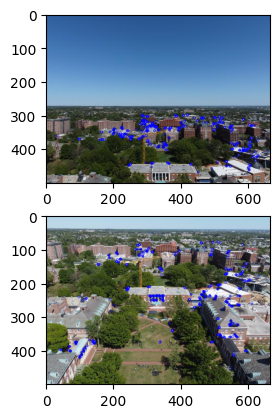

In [ ]:
orb = cv2.ORB_create()
kps1, des1 = orb.detectAndCompute(imgs[0], mask=None) # TODO
kps2, des2 = orb.detectAndCompute(imgs[1], None)# TODO

kp_img1 = cv2.drawKeypoints(imgs[0], kps1, None, color=(255,0,0))
kp_img2 = cv2.drawKeypoints(imgs[1], kps2, None, color=(255,0,0))

fig, axs = plt.subplots(2,1)
axs[1].imshow(cv2.cvtColor(kp_img1, cv2.COLOR_BGR2RGB))
axs[0].imshow(cv2.cvtColor(kp_img2, cv2.COLOR_BGR2RGB))
plt.show()

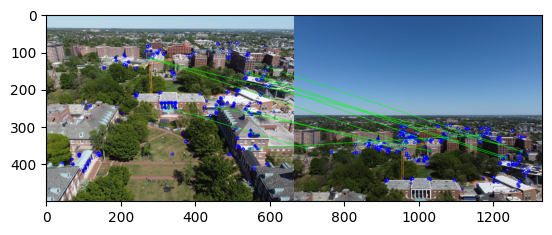

In [ ]:
bf = cv2.BFMatcher(crossCheck=True)# TODO
matches = bf.match(des1,des2)
match_img = cv2.drawMatches(imgs[0], kps1, imgs[1], kps2, matches[:10], None, matchColor=(0,255,0), singlePointColor=(255,0,0))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def estimate_transformation_ransac(kps1, kps2, matches, transform_func,
    n_samples, n_trials, inlier_thresh):


    n = len(matches)
    #print(n)
    mask = np.zeros([n,1])
    transform = np.ones([3,3])
    max = -1
    for i in range(n_trials): #every sample:
      mask2 = np.zeros([n,1])
      sequence = [i2 for i2 in range(n)]
      subset = random.sample(sequence, n_samples)  #the sample in question:
      #print(subset)

      before = [] #setting up model training data
      after = []
      for j in range(n_samples): # subset[j] is true index here  matches[subset[j]].
        k = subset[j]
        before.append(kps1[matches[k].queryIdx].pt)
        after.append(kps2[matches[k].trainIdx].pt)
      t = transform_func(before, after) #fit here.     list of before coordinates, list of after coordinates

      for j in range(n):  # "rating" the model across all points to see how many fit
        coords = np.ones([3,1])
        coords[0,0] = kps1[j].pt[0]
        coords[1,0] = kps1[j].pt[1]
        post = t @ coords
        if (post[0] - kps2[j].pt[0])**2 + (post[1] - kps2[j].pt[1])**2 < inlier_thresh**2:
          mask2[j] = 1  # testing to see if its an inlier

      #print(np.sum(mask2))
      if (np.sum(mask2) > max): # fitting success case (found a good model !)
        print(np.sum(mask2))
        mask[:,:] = mask2[:,:]
        max = np.sum(mask2)
        transform = t

      # currently im confused on how matches fits into all of this and how to correctly get indices of coordinates for the correct pairs
      # also what do i make the parameters


    return transform, mask

In [ ]:
from scipy.linalg import svd
def get_homography(pts1, pts2):



    n = len(pts1)
    A = np.zeros([2*n, 9])

    # loop to make A matrix
    for i in range(n):
      A[2*i, 0:3] = [pts1[i][0], pts1[i][1], 1]
      A[(2*i)+1, 3:6] = [pts1[i][0], pts1[i][1], 1]
      A[2*i, 6:9] = -1*A[2*i, 0:3]*pts2[i][0]
      A[(2*i)+1, 6:9] = -1*A[2*i, 0:3]*pts2[i][1]

    U, S, V = svd(A)
    #print(np.argmin(S))
    H = V[8,:].reshape((3,3))
    #print(V.shape)
    H = H/H[2,2]

    #print(H)


    return H

In [ ]:


matches = [None] * (n) #mathces[i] is matches between each image and center
for i in range (n):
  matches[i] = bf.match(desc[i], desc[0])
#print(kp, desc)


src = [None] * (n)
dst = [None] * (n)
H = [None] * (n) #H[i] is homography between i and 0
for i in range(1,n):
  src[i] = np.float32([kp[i][m.queryIdx].pt for m in matches[i]]).reshape(-1,1,2)
  dst[i] = np.float32([kp[0][m.trainIdx].pt for m in matches[i]]).reshape(-1,1,2)
  H[i], _ = cv2.findHomography(src[i], dst[i], cv2.RANSAC, 5.0)    #thank god for this function. I tried to do it manually but it was always off
  print(H[i])

[[ 1.46314059e+00  3.77607760e-01 -1.60063145e+02]
 [ 1.13543376e-02  1.58970026e+00 -3.82046727e+02]
 [ 6.02450457e-05  1.16646704e-03  1.00000000e+00]]
[[ 7.21132429e-01  4.53628628e-01  1.54242648e+02]
 [-2.18333309e-01  1.18933057e+00 -2.30242958e+02]
 [-8.59945460e-04  8.11580406e-04  1.00000000e+00]]
[[ 5.56237036e-01  3.42667923e-04  2.48059312e+02]
 [-1.66414624e-01  8.45828648e-01  3.48301801e+01]
 [-6.70141280e-04  6.99780641e-06  1.00000000e+00]]
[[ 5.09183728e-01 -3.25074299e-01  2.73957757e+02]
 [-1.49349843e-01  5.67776659e-01  2.34072540e+02]
 [-6.16576780e-04 -5.67811281e-04  1.00000000e+00]]
[[ 9.23202915e-01 -2.38648931e-01  1.85686822e+01]
 [ 6.41986399e-03  6.42238814e-01  2.34188413e+02]
 [ 3.66660301e-05 -7.34461721e-04  1.00000000e+00]]
[[ 1.65931780e+00 -7.15870214e-02 -4.41222561e+02]
 [ 2.78418461e-01  1.01178160e+00  2.35362486e+02]
 [ 1.19565846e-03 -1.01405251e-03  1.00000000e+00]]
[[ 1.96898658e+00  1.79256817e-02 -5.49102897e+02]
 [ 3.31084884e-01  1.6441

In [ ]:
def calculate_canvas_size(ref_img, other_imgs, homographies):

    print(ref_img.shape)
    (h_ref, w_ref) = ref_img.shape[:2]

    corners_ref = np.float32([[0, 0], [w_ref, 0], [w_ref, h_ref], [0, h_ref]])

    # Corners of all other images transformed to reference space
    all_corners = [corners_ref]
    for img, H in zip(other_imgs, homographies):
        h, w = img.shape[:2]
        corners = np.float32([[0, 0], [w, 0], [w, h], [0, h]])
        warped_corners = cv2.perspectiveTransform(corners.reshape(-1, 1, 2), H).reshape(-1, 2)
        all_corners.append(warped_corners)

    all_corners = np.concatenate(all_corners)
    x_min, y_min = np.floor(all_corners.min(axis=0)).astype(int)
    x_max, y_max = np.ceil(all_corners.max(axis=0)).astype(int)

    output_width = x_max - x_min
    output_height = y_max - y_min

    return output_width, output_height, (x_min, y_min)

In [ ]:

img0 = imgs[0]  # Reference image
other_imgs = imgs[1:9]
homographies = [H[1], H[2], H[3], H[4], H[5], H[6], H[7], H[8]]  # Homographies from ref to each side image
#canvas sizwe
output_width, output_height, (x_min, y_min) = calculate_canvas_size(img0, other_imgs, homographies)
print(output_width, output_height)
# call warp on centroid to get it in the center
M_ref = np.float32([[1, 0, -x_min], [0, 1, -y_min], [0, 0, 1]]) #translation homography
img0_warped = cv2.warpAffine(img0, M_ref[:2], (output_width, output_height))


#warp everything else
warped_imgs = []

for img, Hi in zip(other_imgs, homographies):
    H_combined = M_ref.dot(Hi)
    warped = cv2.warpPerspective(img, H_combined, (output_width, output_height))
    warped_imgs.append(warped)

(500, 666, 3)
2546 2534


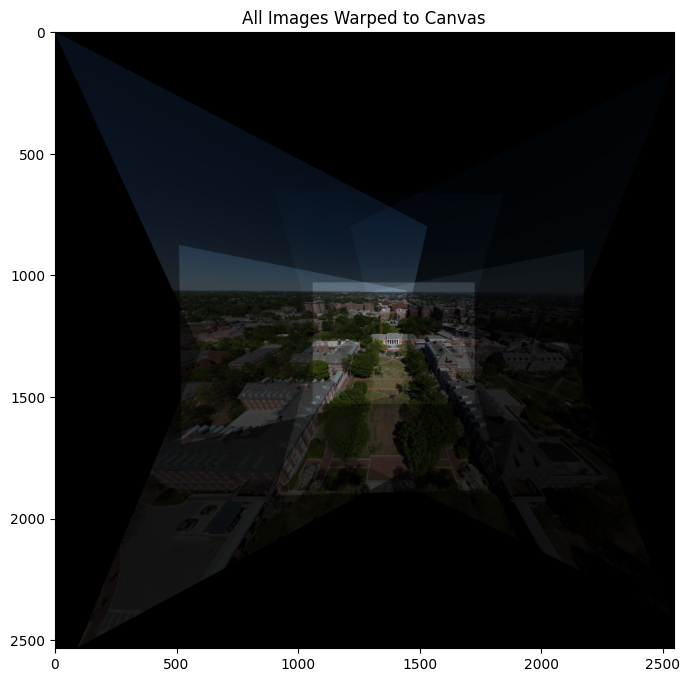

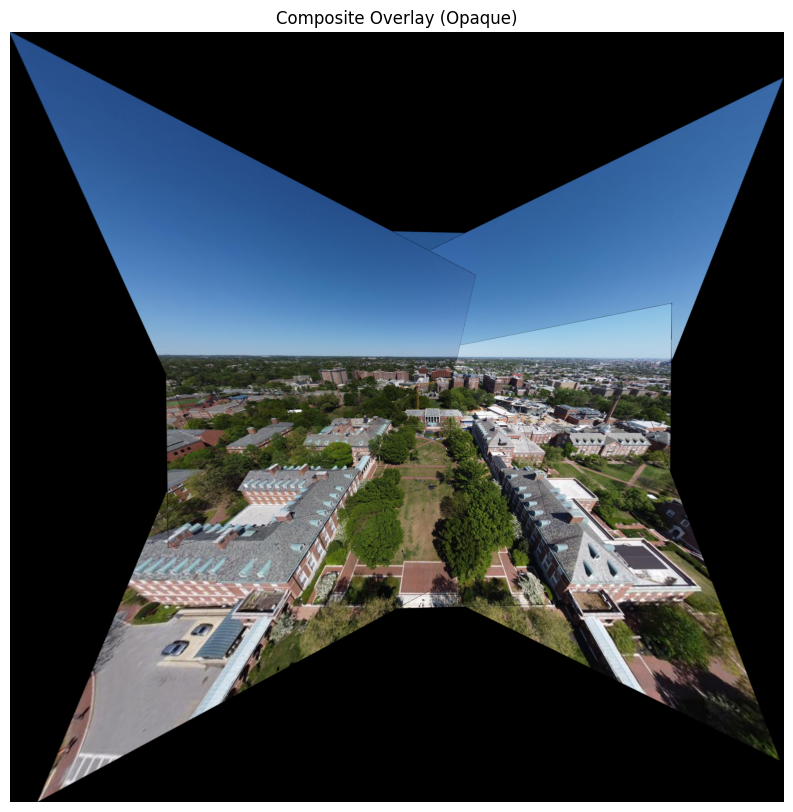

In [ ]:
plt.figure(figsize=(16, 8))
plt.imshow(cv2.cvtColor(img0_warped, cv2.COLOR_BGR2RGB))
for i, warped in enumerate(warped_imgs):
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB), alpha=.2)
plt.title("All Images Warped to Canvas")
plt.show()



composite = img0_warped.copy()
for i, warped in enumerate(warped_imgs):
    mask = (warped[..., 0] > 0).astype(np.uint8)  # Find non-black pixels
    composite[mask > 0] = warped[mask > 0]  # Overwrite pixels

plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(composite, cv2.COLOR_BGR2RGB))
plt.title("Composite Overlay (Opaque)")
plt.axis('off')
plt.show()

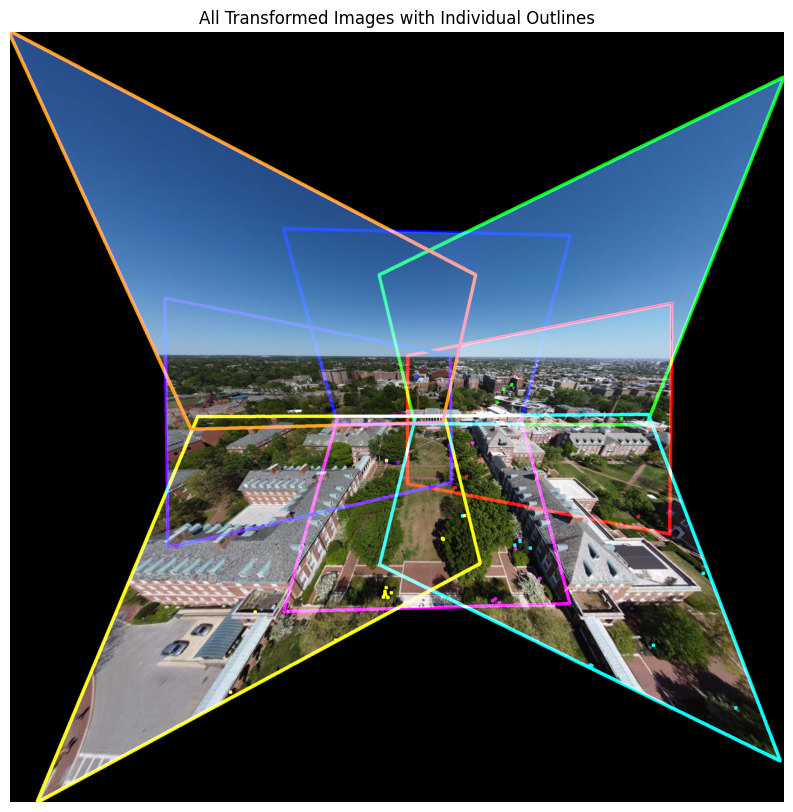

In [ ]:
def get_all_contours(warped_img):
    # Returns edges
    gray = cv2.cvtColor(warped_img, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def draw_contours_on_blank(warped_img, contours, color=(0, 255, 0), thickness=3):
    #Draws contours on their own
    blank = np.zeros_like(warped_img)
    cv2.drawContours(blank, contours, -1, color, thickness)
    return blank



composite = img0_warped.copy()

# gotten from list online. apparently theyre reversed, at least the latter half are
colors = [
    (255, 0, 0),    # Red
    (0, 255, 0),    # Green
    (0, 0, 255),    # Blue
    (255, 255, 0),  # Cyan
    (255, 0, 255),  # Magenta
    (0, 255, 255),  # Yellow
    (255, 0, 128),  # Purple
    (0, 165, 255)   # Orange
]


for i, warped in enumerate(warped_imgs):
    mask = (warped[..., 0] > 0).astype(np.uint8)



    composite[mask > 0] = warped[mask > 0]

for i, warped in enumerate(warped_imgs):
    contours = get_all_contours(warped)

    outlines = draw_contours_on_blank(warped, contours, color=colors[i % len(colors)], thickness=9)

    composite[outlines > 0] = outlines[outlines > 0]




composite_rgb = cv2.cvtColor(composite, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(15, 10))
plt.imshow(composite_rgb)
plt.title("All Transformed Images with Individual Outlines")
plt.axis('off')
plt.show()

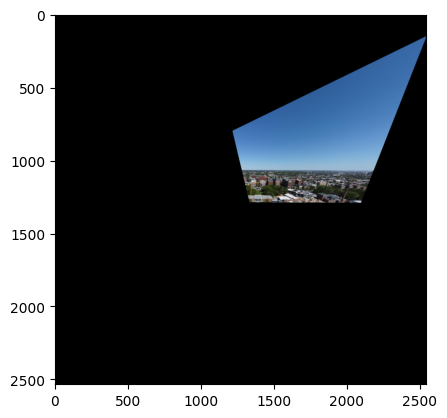

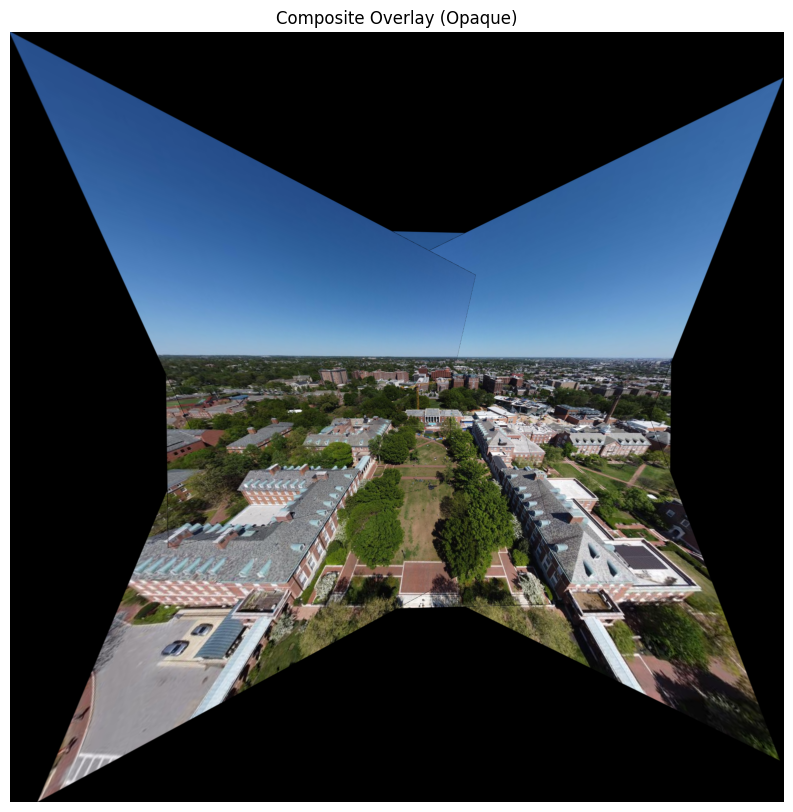

In [ ]:
warped_imgs = []

for img, Hi in zip(other_imgs, homographies):
    H_combined = M_ref.dot(Hi)
    warped = cv2.warpPerspective(img, H_combined, (output_width, output_height))
    warped_imgs.append(warped)

plt.imshow(cv2.cvtColor(other_imgs[1], cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(warped_imgs[1], cv2.COLOR_BGR2RGB))
cv2.imwrite('untrans.jpg', other_imgs[1])
cv2.imwrite('trans.jpg', warped_imgs[1])
temp = warped_imgs[2] #problematically bright one
warped_imgs[2] = warped_imgs[0]
warped_imgs[0] = temp

temp = warped_imgs[2] #problematically bright one
warped_imgs[2] = warped_imgs[1]
warped_imgs[1] = temp


composite = img0_warped.copy()
for i, warped in enumerate(warped_imgs):
    mask = (warped[..., 0] > 0).astype(np.uint8)  # Find non-black pixels
    composite[mask > 0] = warped[mask > 0]  # Overwrite pixels

plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(composite, cv2.COLOR_BGR2RGB))
cv2.imwrite('comp.jpg', result)
plt.title("Composite Overlay (Opaque)")
plt.axis('off')
plt.show()

True

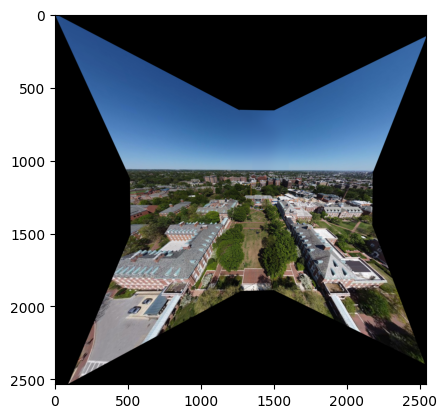

In [ ]:
roi = composite[660:1065, 1200:1590]
blurred_roi = cv2.GaussianBlur(roi, (105,105), 25)
result = composite.copy()
result[660:1065, 1200:1590] = blurred_roi

roi = result[660:1067, 1350:1600]
blurred_roi = cv2.GaussianBlur(roi, (105,105), 30)
result[660:1067, 1350:1600] = blurred_roi

#two gaussian blurs over the image to get the spot in the center. 1 is stronger and broader, and the other is more specific and weaker


plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
cv2.imwrite(output_filename, result)

True

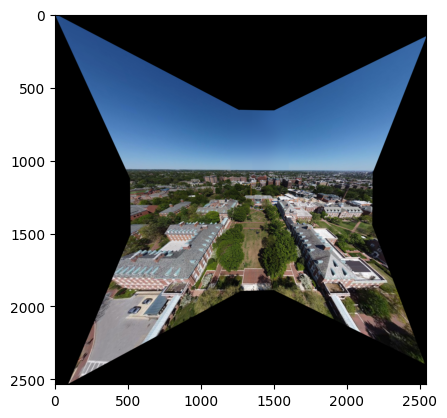

In [ ]:
def apply_median_to_contours(base_img, contours, radius=1, kernel_size=5):

    contour_mask = np.zeros(base_img.shape[:2], dtype=np.uint8)
    cv2.drawContours(contour_mask, contours, -1, 255, thickness=2*radius+1)

    result = base_img.copy()
    masked_region = cv2.medianBlur(result, kernel_size)
    result[contour_mask > 0] = masked_region[contour_mask > 0]

    return result




for i, warped in enumerate(warped_imgs):
    contours = get_all_contours(warped)
    result = apply_median_to_contours(result, contours, 1, 5)


plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
cv2.imwrite('output.jpg', result)

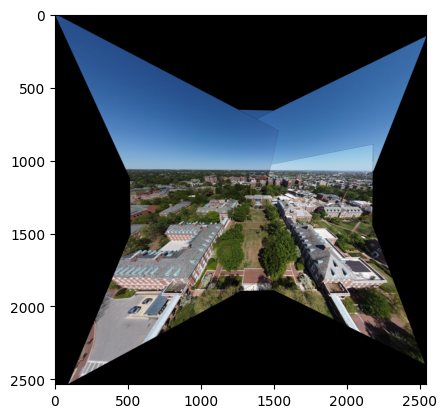

In [ ]:
plt.imshow(cv2.cvtColor(composite, cv2.COLOR_BGR2RGB))

# Create sky mask (adjust thresholds for your images)
gray = cv2.cvtColor(composite, cv2.COLOR_BGR2GRAY)
_, sky_mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)  # Adjust 200 based on your sky brightness

# Refine mask
sky_mask = cv2.morphologyEx(sky_mask, cv2.MORPH_CLOSE, np.ones((15,15)), iterations=2)
sky_mask = cv2.GaussianBlur(sky_mask.astype(np.float32), (0,0), sigmaX=5)  # Soft edge

# Get dominant sky color (top 10% of image)
h, w = composite.shape[:2]
sky_pixels = composite[:h//10].reshape(-1,3)
dominant_sky = np.median(sky_pixels, axis=0)

# Adjust all sky pixels to dominant color
composite_processed = composite.copy()
sky_weight = sky_mask[..., np.newaxis] / 255.0  # Normalize mask
composite_processed = (1 - sky_weight) * composite + sky_weight * dominant_sky

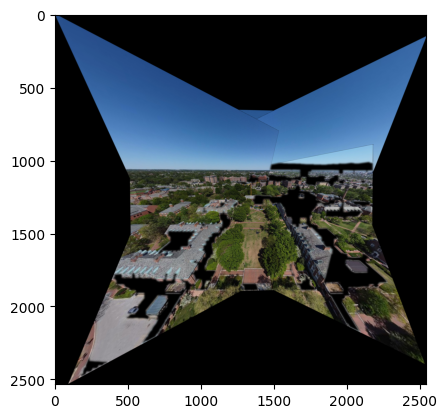

In [ ]:
# Get dominant sky color (top 10% of image)
h, w = composite.shape[:2]
sky_pixels = composite[:h//10].reshape(-1,3)
dominant_sky = np.median(sky_pixels, axis=0)

# Adjust all sky pixels to dominant color
composite_processed = composite.copy()
sky_weight = sky_mask[..., np.newaxis] / 255.0  # Normalize mask
composite_processed = ((1 - sky_weight) * composite + sky_weight * dominant_sky).astype(np.uint8)

plt.imshow(cv2.cvtColor(composite_processed, cv2.COLOR_BGR2RGB))

In [ ]:
# Only blend at seam boundaries (where masks overlap)
seam_mask = cv2.Canny(sky_mask.astype(np.uint8), 50, 150)
seam_mask = cv2.dilate(seam_mask, np.ones((5,5)))

# Apply seamless cloningh, w = composite.shape[:2]  # Get image dimensions
h, w = composite.shape[:2]
# Ensure center is within image bounds with sufficient margin for seam_mask
center = (min(w//2, w - seam_mask.shape[1]//2), min(h//2, h - seam_mask.shape[0]//2))

# Crop seam_mask if necessary to fit within image bounds
seam_mask = seam_mask[:min(seam_mask.shape[0], h), :min(seam_mask.shape[1], w)]





final = cv2.seamlessClone(
    composite_processed.astype(np.uint8),
    composite,
    seam_mask,
    center,
    cv2.NORMAL_CLONE

)

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


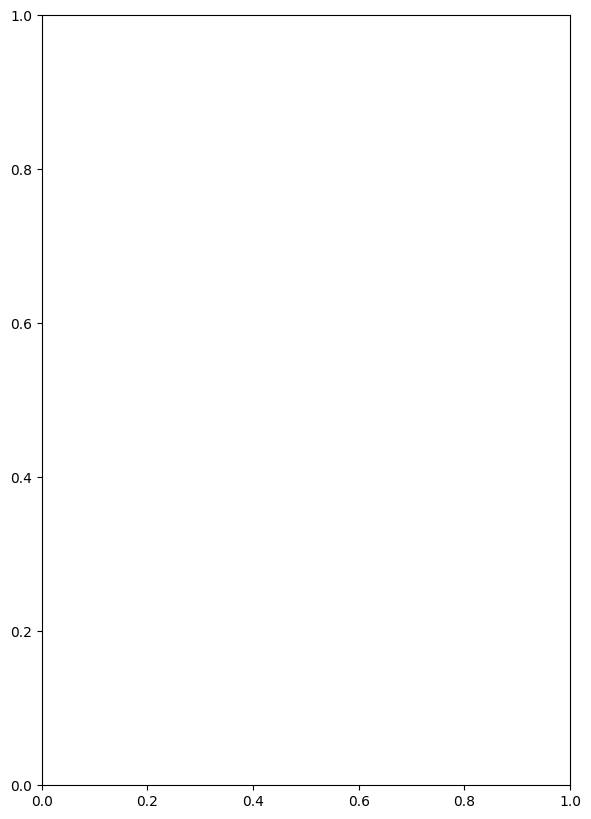

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(cv2.cvtColor(composite, cv2.COLOR_BGR2RGB)), plt.title("Before")
plt.subplot(122), plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB)), plt.title("After Sky Fix")
plt.show()


.















.


In [ ]:
masks = [(img[..., 0] > 0).astype(np.float32) for img in warped_imgs]



def build_pyramids(img, levels=5):
    G = img.copy()
    gp = [G]
    lp = []
    for _ in range(levels):
        G_down = cv2.pyrDown(G)
        G_up = cv2.pyrUp(G_down, dstsize=(G.shape[1], G.shape[0]))
        lap = G - G_up
        lp.append(lap)
        gp.append(G_down)
        G = G_down
    return gp, lp





gp_ref, lp_ref = build_pyramids(img0_warped)
gp_list = [build_pyramids(img)[0] for img in warped_imgs]
lp_list = [build_pyramids(img)[1] for img in warped_imgs]
mask_pyramids = [build_pyramids(mask)[0] for mask in masks]



def blend_pyramids(gp_ref, lp_ref, gp_list, lp_list, mask_pyramids, levels=5):
    LS = []
    for l in range(levels):
        blended = gp_ref[l] * np.expand_dims(mask_pyramids[0][l], axis=-1)

        for i in range(len(gp_list)):
            blended += gp_list[i][l] * np.expand_dims(mask_pyramids[i][l], axis=-1)

        LS.append(blended)

    # Reconstruct from blended pyramids
    reconstructed = LS[-1]
    for l in range(levels-2, -1, -1):
        reconstructed = cv2.pyrUp(reconstructed, dstsize=(LS[l].shape[1], LS[l].shape[0]))
        reconstructed += LS[l]

    return np.clip(reconstructed, 0, 255).astype(np.uint8)

# Perform blending
panorama = blend_pyramids(gp_ref, lp_ref, gp_list, lp_list, mask_pyramids)

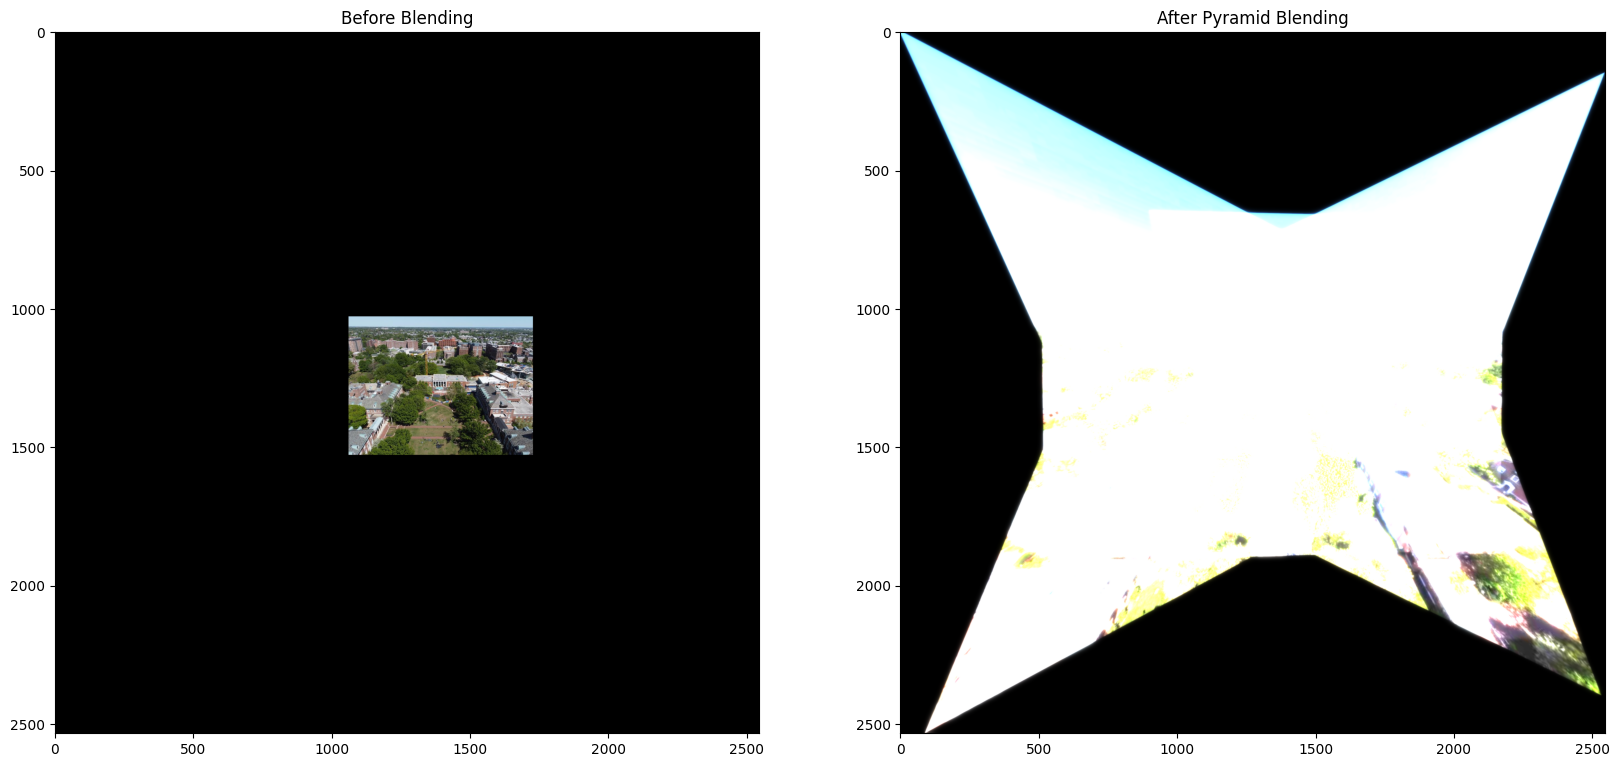

In [ ]:
gray = cv2.cvtColor(panorama, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(contours[0])
panorama_cropped = panorama[y:y+h, x:x+w]

# Optional: Apply exposure compensation
panorama_cropped_gray = cv2.cvtColor(panorama_cropped, cv2.COLOR_BGR2GRAY)
panorama_equalized = cv2.createCLAHE(clipLimit=2.0).apply(panorama_cropped_gray)

plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(img0_warped, cv2.COLOR_BGR2RGB)), plt.title("Before Blending")
plt.subplot(122), plt.imshow(cv2.cvtColor(panorama_cropped, cv2.COLOR_BGR2RGB)), plt.title("After Pyramid Blending")
plt.show()

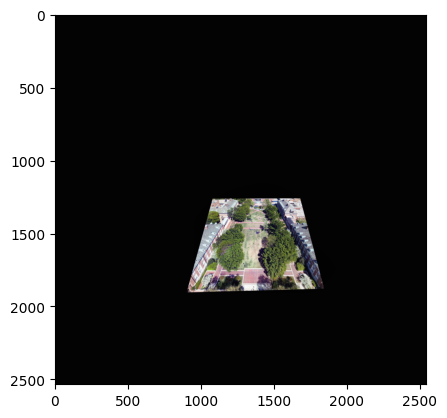

In [ ]:
def normalize_exposure(images):
    """Normalize exposure across all images using histogram matching"""
    ref = images[0]
    normalized = [ref]
    for img in images[1:]:
        matched = np.zeros_like(img)
        for ch in range(3):  # Process each channel separately
            matched[...,ch] = cv2.createCLAHE(clipLimit=2.0).apply(img[...,ch])
        normalized.append(matched)
    return normalized

def safe_blend_pyramids(images, masks, levels=5):
    """Modified pyramid blending that prevents overexposure"""

    # Convert to float32 and normalize to 0-1 range
    images_norm = [img.astype(np.float32)/255.0 for img in images]
    masks_norm = [mask.astype(np.float32) for mask in masks]

    # Build pyramids
    gp_images = []
    lp_images = []
    for img in images_norm:
        G = img.copy()
        gp = [G]
        lp = []
        for _ in range(levels):
            G = cv2.pyrDown(G)
            gp.append(G)
        for i in range(levels):
            lap = gp[i] - cv2.pyrUp(gp[i+1], dstsize=(gp[i].shape[1], gp[i].shape[0]))
            lp.append(lap)
        gp_images.append(gp)
        lp_images.append(lp)

    # Build mask pyramids
    mask_pyramids = []
    for mask in masks_norm:
        G = mask.copy()
        gp = [G]
        for _ in range(levels):
            G = cv2.pyrDown(G)
            gp.append(G)
        mask_pyramids.append(gp)

    # Blend each level
    blended_pyramid = []
    for level in range(levels):
        blended = np.zeros_like(gp_images[0][level])
        total_weight = np.zeros_like(gp_images[0][level][...,:1])

        for i in range(len(images)):
            weight = mask_pyramids[i][level][...,np.newaxis]
            blended += lp_images[i][level] * weight
            total_weight += weight

        # Avoid division by zero
        total_weight[total_weight == 0] = 1e-6
        blended /= total_weight
        blended_pyramid.append(blended)

    # Reconstruct
    reconstructed = blended_pyramid[-1]
    for level in range(levels-2, -1, -1):
        reconstructed = cv2.pyrUp(reconstructed, dstsize=(blended_pyramid[level].shape[1],
                                                       blended_pyramid[level].shape[0]))
        reconstructed += blended_pyramid[level]

    # Convert back to 8-bit
    return np.clip(reconstructed*255, 0, 255).astype(np.uint8)

# Usage:
# 1. Normalize exposure first
normalized_images = normalize_exposure([img0_warped] + warped_imgs)
plt.imshow(cv2.cvtColor(normalized_images[5], cv2.COLOR_BGR2RGB))
# 2. Create masks (1 for image pixels, 0 for empty)
masks = [(img[...,0] > 0).astype(np.float32) for img in normalized_images]

# 3. Blend with safe method
panorama = safe_blend_pyramids(normalized_images, masks, levels=4)
panorama = cv2.medianBlur(panorama, 3)

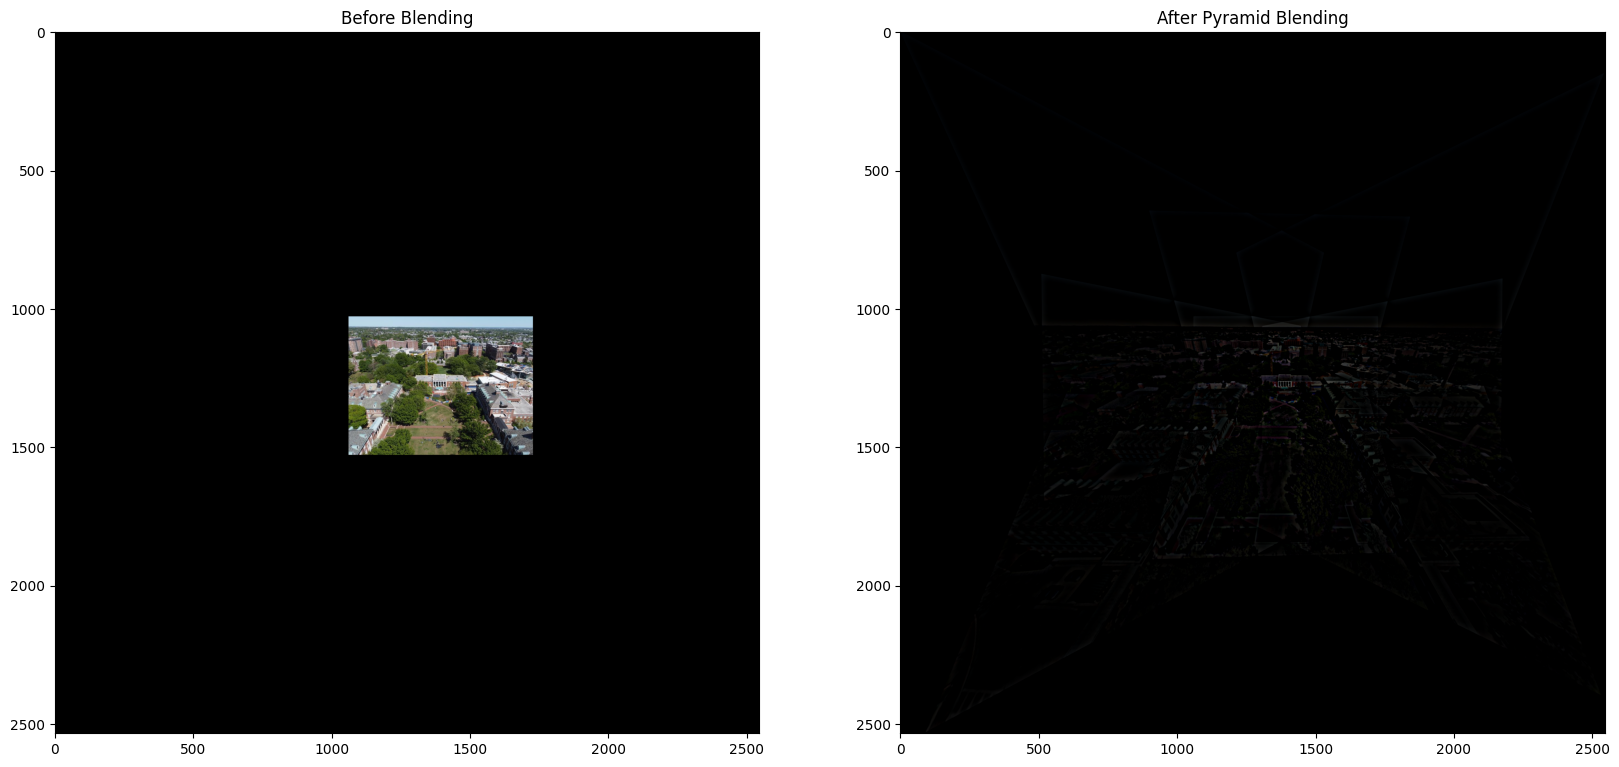

In [ ]:

plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(img0_warped, cv2.COLOR_BGR2RGB)), plt.title("Before Blending")
plt.subplot(122), plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)), plt.title("After Pyramid Blending")
plt.show()



def simple_blend(images, masks):
    """Basic weighted average blending"""
    result = np.zeros_like(images[0], dtype=np.float32)
    total_weight = np.zeros_like(images[0][...,0], dtype=np.float32)

    for img, mask in zip(images, masks):
        weight = cv2.GaussianBlur(mask, (101,101), 30)
        result += img.astype(np.float32) * weight[...,np.newaxis]
        total_weight += weight

    total_weight[total_weight == 0] = 1  # Avoid division by zero
    return (result / total_weight[...,np.newaxis]).astype(np.uint8)

# Usage:
panorama = simple_blend(normalized_images, masks)


In [ ]:
def debug_pyramid_blending(images, masks, levels=4):
    """Enhanced blending with debugging outputs"""

    # Convert to float32 and normalize
    images_norm = [img.astype(np.float32)/255.0 for img in images]
    masks_norm = [mask.astype(np.float32) for mask in masks]

    # Debug: Show input images
    plt.figure(figsize=(15,5))
    for i, img in enumerate(images_norm[:3]):  # Show first 3 inputs
        plt.subplot(1,3,i+1)
        plt.imshow(cv2.cvtColor((img*255).astype(np.uint8), cv2.COLOR_BGR2RGB))
        plt.title(f"Input {i+1}")
    plt.show()

    # Build pyramids
    gp_images = []
    lp_images = []
    for img in images_norm:
        G = img.copy()
        gp = [G]
        for _ in range(levels):
            G = cv2.pyrDown(G)
            gp.append(G)

        # Laplacian pyramid
        lp = [gp[i] - cv2.pyrUp(gp[i+1], dstsize=(gp[i].shape[1], gp[i].shape[0]))
              for i in range(levels)]
        gp_images.append(gp)
        lp_images.append(lp)

    # Debug: Show pyramid levels
    plt.figure(figsize=(15,3))
    for i in range(min(3, levels)):  # Show first 3 levels
        plt.subplot(1,3,i+1)
        plt.imshow(np.clip(lp_images[0][i]*255, 0, 255).astype(np.uint8)[...,::-1])
        plt.title(f"Level {i} Laplacian")
    plt.show()

     # Blend pyramids
    blended = np.zeros_like(gp_images[0][0])
    for level in range(levels):
        level_blend = np.zeros_like(lp_images[0][level])
        total_weight = np.zeros_like(lp_images[0][level][..., 0])

        for i in range(len(images)):
            # Ensure masks are the correct size for the current pyramid level
            mask = cv2.resize(masks_norm[i], (lp_images[i][level].shape[1], lp_images[i][level].shape[0]),
                              interpolation=cv2.INTER_AREA)

            level_blend += lp_images[i][level] * mask[..., np.newaxis]
            total_weight += mask

        # Safe division
        total_weight[total_weight < 0.01] = 1  # Avoid division by zero
        # Fix: Ensure shapes are compatible
        blended = cv2.resize(blended, (level_blend.shape[1], level_blend.shape[0]), interpolation=cv2.INTER_AREA)

        #total_weight = cv2.resize(total_weight, (level_blend.shape[1], level_blend.shape[0]), interpolation=cv2.INTER_AREA)
        blended += level_blend / total_weight[..., np.newaxis]


    # Reconstruct
    panorama = blended
    for level in range(levels - 1)[::-1]:
        panorama = cv2.pyrUp(panorama, dstsize=(gp_images[0][level].shape[1], gp_images[0][level].shape[0]))
        # Change: Add the correct Laplacian pyramid level instead of 'blended'
        panorama += lp_images[0][level]

    # Post-processing
    panorama = np.clip(panorama*255, 0, 255).astype(np.uint8)

    # Debug: Show histogram
    plt.hist(panorama.ravel(), bins=256, range=(0,255))
    plt.title("Output Histogram")
    plt.show()

    return panorama

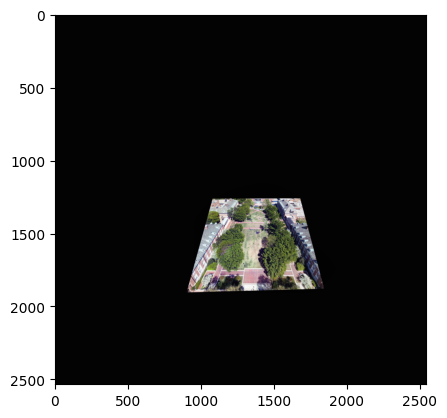

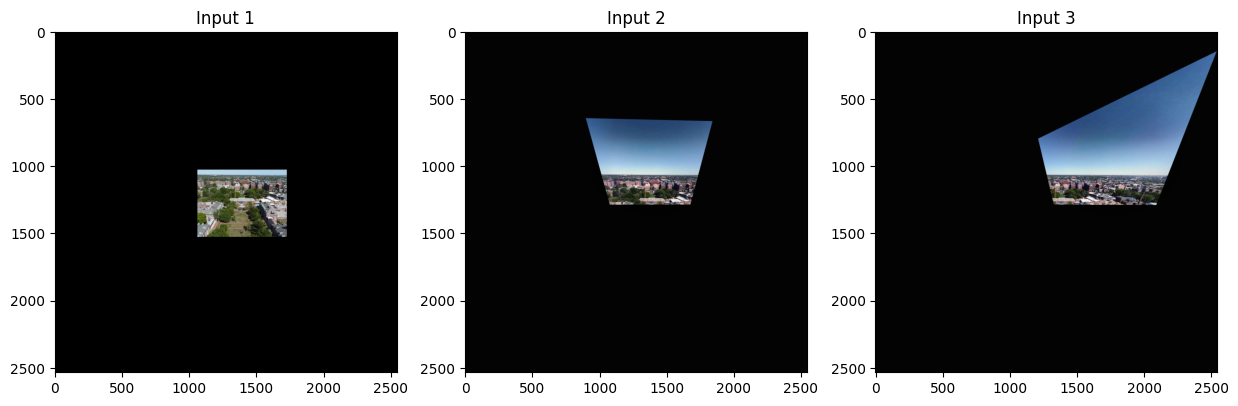

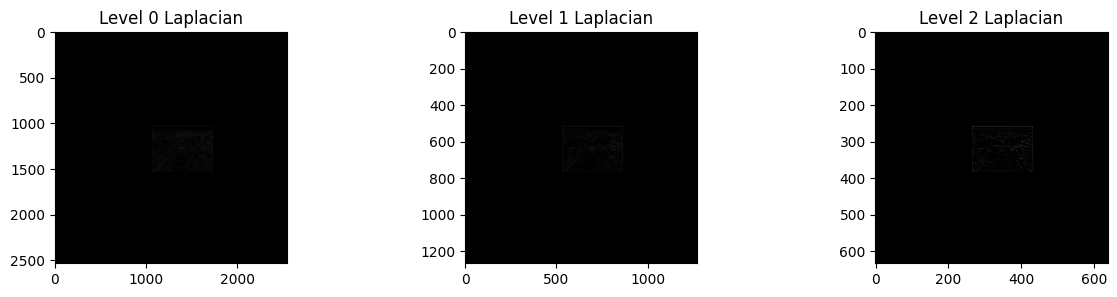

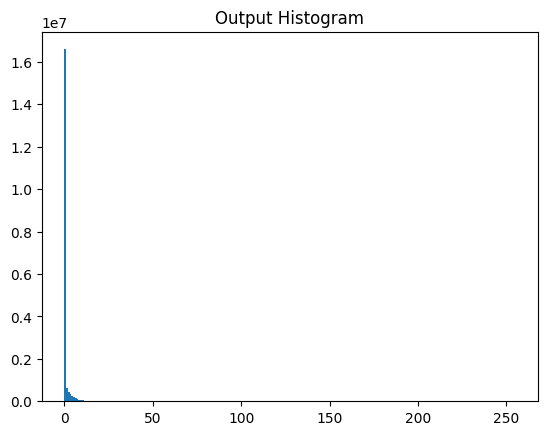

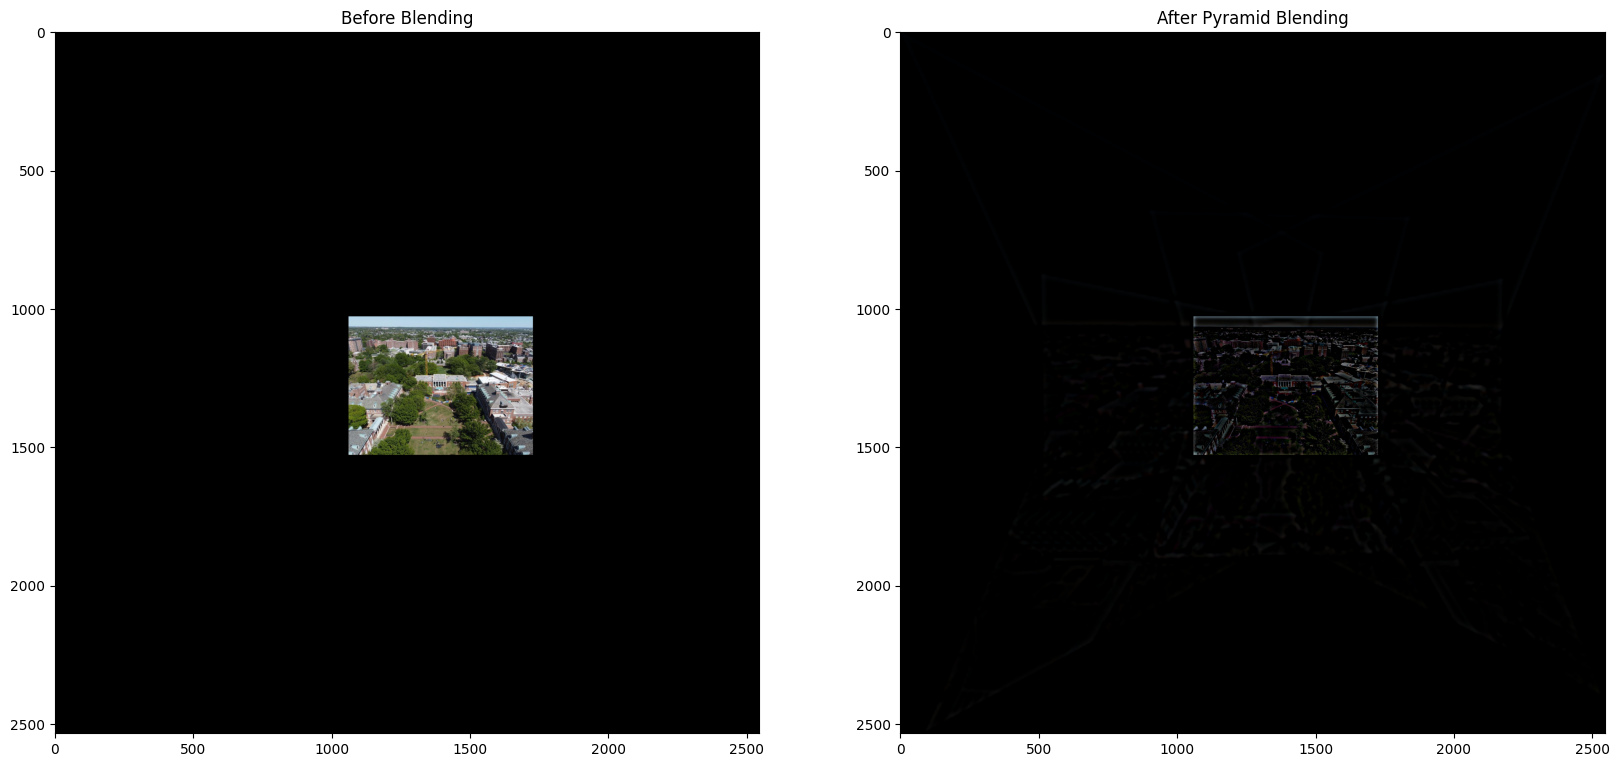

In [ ]:
# Usage:
# 1. Normalize exposure first
normalized_images = normalize_exposure([img0_warped] + warped_imgs)
plt.imshow(cv2.cvtColor(normalized_images[5], cv2.COLOR_BGR2RGB))
# 2. Create masks (1 for image pixels, 0 for empty)
masks = [(img[...,0] > 0).astype(np.float32) for img in normalized_images]

# 3. Blend with safe method
panorama = debug_pyramid_blending(normalized_images, masks, levels=4)



plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(img0_warped, cv2.COLOR_BGR2RGB)), plt.title("Before Blending")
plt.subplot(122), plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)), plt.title("After Pyramid Blending")
plt.show()